In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [41]:
datadir = os.path.join(os.path.realpath(''),'cached')
datadir = os.path.join(datadir,'Aggreegated.csv')
df = pd.read_csv(datadir)

In [42]:
df.columns
df.index

RangeIndex(start=0, stop=39572, step=1)

In [43]:
df.dtypes

timeStamp            int64
elapsed              int64
label               object
responseCode        object
responseMessage     object
threadName          object
dataType            object
success               bool
failureMessage     float64
bytes                int64
sentBytes            int64
grpThreads           int64
allThreads           int64
URL                 object
Latency              int64
IdleTime             int64
Connect              int64
dtype: object

In [44]:
df = df[df["success"] == True]

In [45]:
df = df[df["elapsed"] < 3000]

In [46]:
df.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1577624147359,8,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,217,134,1,1,http://127.0.0.1:8000/cached/?Cluster=27.0,8,0,1
1,1577624147372,6,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,217,134,1,1,http://127.0.0.1:8000/cached/?Cluster=27.0,6,0,1
2,1577624147379,4,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,217,134,1,1,http://127.0.0.1:8000/cached/?Cluster=27.0,4,0,0
3,1577624147858,5,HTTP Request,200,OK,Thread Group 1-2,text,True,NaN,217,134,2,2,http://127.0.0.1:8000/cached/?Cluster=27.0,5,0,0
4,1577624147865,5,HTTP Request,200,OK,Thread Group 1-2,text,True,NaN,217,134,2,2,http://127.0.0.1:8000/cached/?Cluster=27.0,5,0,0


In [47]:
df.describe()

,timeStamp,elapsed,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
count,2.967300e+04,29673.000000,0.0,29673.000000,29673.0,29673.000000,29673.000000,29673.000000,29673.0,29673.000000
mean,1.577624e+12,15.722408,NaN,1681.238196,134.0,91.023725,91.023725,15.663836,0.0,0.467428
std,2.273668e+05,5.991283,NaN,1703.057496,0.0,19.489248,19.489248,5.984735,0.0,0.513920
min,1.577624e+12,4.000000,NaN,217.000000,134.0,1.000000,1.000000,4.000000,0.0,0.000000
25%,1.577624e+12,12.000000,NaN,217.000000,134.0,98.000000,98.000000,12.000000,0.0,0.000000
50%,1.577625e+12,16.000000,NaN,217.000000,134.0,100.000000,100.000000,16.000000,0.0,0.000000
75%,1.577625e+12,19.000000,NaN,3662.000000,134.0,100.000000,100.000000,19.000000,0.0,1.000000
max,1.577625e+12,95.000000,NaN,3662.000000,134.0,100.000000,100.000000,95.000000,0.0,14.000000


In [48]:
df_cache = df[df['Latency']<45]

In [37]:
df_cache = df_cache[:300]

In [49]:
df_cache = df_cache[:100]

In [50]:
len(df_cache)

100

In [53]:
df_uncache = df[df['Latency']>30]

In [55]:
df_uncache = df_uncache[:100]

In [56]:
len(df_uncache)

100

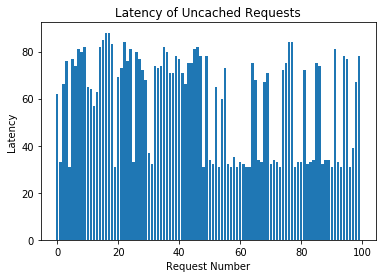

In [76]:
#Latency
#Latency is a difference between time when request was sent and time when response has started to be received.
plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.bar(range(0,100),df_uncache['Latency'])
plt.title('Latency of Uncached Requests')
plt.show()

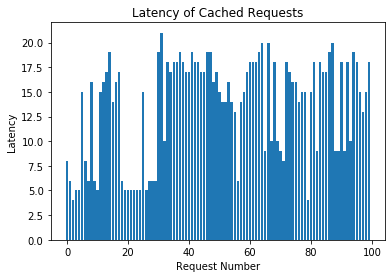

In [75]:
#Latency
#Latency is a difference between time when request was sent and time when response has started to be received.
plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.bar(range(0,100),df_cache['Latency'])
plt.title('Latency of Cached Requests')
plt.show()

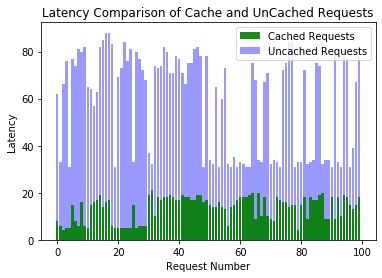

In [73]:
#Latency is a difference between time when request was sent and time when response has started to be received.

p2 = plt.bar(range(0,100),df_uncache['Latency'], color="blue", alpha=0.4)
p1 = plt.bar(range(0,100),df_cache['Latency'],color="green",alpha=0.9)

plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.title('Latency Comparison of Cache and UnCached Requests')
plt.legend((p1[0], p2[0]), ('Cached Requests', 'Uncached Requests'))
plt.show()

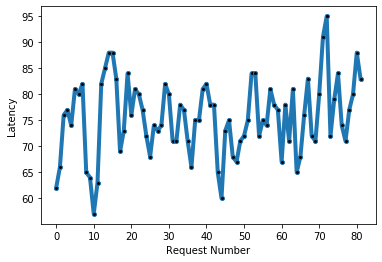

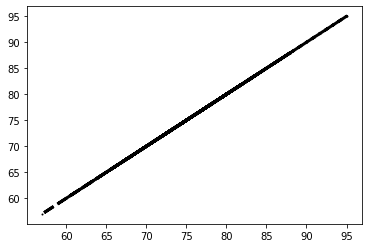

In [41]:
#Latency
#Latency is a difference between time when request was sent and time when response has started to be received.
plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.plot(range(0,82),'Latency', data=df_uncache, marker='o',markerfacecolor='black', markersize=4, linewidth=4)
plt.show()
df.sort_values(by='Latency',inplace=True, ascending=False)
plt.plot('Latency','Latency', data=df_uncache, marker='o', markerfacecolor='grey', markersize=1, color='black', linewidth=3,linestyle='dashed')

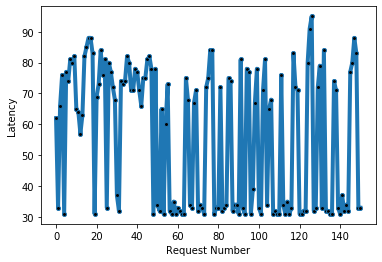

In [133]:
plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.plot(range(0,151),'Latency', data=df_uncache, marker='o',markerfacecolor='black', markersize=4, linewidth=4)
plt.show()

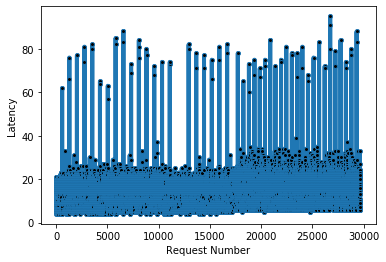

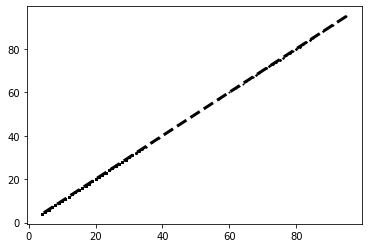

In [60]:
#Latency
#Latency is a difference between time when request was sent and time when response has started to be received.
plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.plot(range(0,29673),'Latency', data=df, marker='o',markerfacecolor='black', markersize=4, linewidth=4)
plt.show()
df.sort_values(by='Latency',inplace=True, ascending=False)
plt.plot('Latency','Latency', data=df, marker='o', markerfacecolor='grey', markersize=1, color='black', linewidth=3,linestyle='dashed')

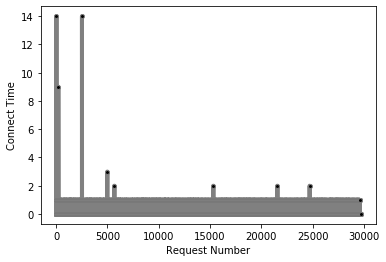

In [27]:
#ConnectTime
plt.xlabel('Request Number')
plt.ylabel('Connect Time')
plt.plot( range(0,29673),'Connect', data=df, marker='o', markerfacecolor='black', markersize=4, color='grey', linewidth=4)

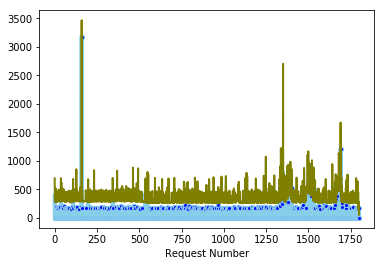

In [12]:
#Connection Time and Latency
plt.xlabel('Request Number')
plt.plot(range(0,29673),'Connect', data=df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=4)
plt.plot( 'elapsed', '', data=df,  marker='', color='olive', linewidth=2)
#plt.plot( 'elapsed', '', data=df,  marker='', color='olive', linewidth=2)

In [63]:
df.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
15794,1577624465420,22,HTTP Request,200,OK,Thread Group 1-51,text,True,NaN,217,134,51,51,http://127.0.0.1:8000/cached/?Cluster=27.0,22,0,14
36220,1577624770105,79,HTTP Request,200,OK,Thread Group 1-29,text,True,NaN,3662,134,100,100,http://127.0.0.1:8000/cached/?Cluster=27.0,79,0,14
30466,1577624725997,29,HTTP Request,200,OK,Thread Group 1-32,text,True,NaN,3662,134,100,100,http://127.0.0.1:8000/cached/?Cluster=27.0,29,0,9
39487,1577624795037,20,HTTP Request,200,OK,Thread Group 1-41,text,True,NaN,3662,134,84,84,http://127.0.0.1:8000/cached/?Cluster=27.0,20,0,3
14812,1577624284521,14,HTTP Request,200,OK,Thread Group 1-5,text,True,NaN,217,134,88,88,http://127.0.0.1:8000/cached/?Cluster=27.0,13,0,2


In [84]:
cachehit = df[df["elapsed"] <18].shape[0]

In [85]:
cachemiss = df[df["elapsed"] >18].shape[0]

In [88]:
cachehitratio = (cachehit/(cachehit+cachemiss))*100
cachehitratio

68.55628836109946